<i>Note, run</i> `conda install beautifulsoup4` <i>in Anaconda prompt before doing this lab. Alternatively, upload this to ArcGIS Online and run in ArcGIS Notebooks.</i>

# APIs & Web Scraping
Tons of web data useful for social scientists and humanists

* social media
* news media
* government publications
* organizational records

Two kinds of ways to get data off the web
* Webscraping - i.e. user-facing websites for humans
* APIs - i.e. application-facing, for computers

## What is an API?
* Application Programming Interface
* set of rules and procedures that facilitate interactions between computers and their applications
* allows users to query a remote database over the internet
* take on a variety of formats
* majority adhere to a particular style known as Representational State Transfer or REST
* "RESTful" APIs are convenient because we can use them to query databases using URLs

### HTML
HTTP (Hypertext Transfer Protocol) is one of the main ways computers communicate with each other on the Internet.

<u>Client-server computing model</u>: servers provide a service or resource, and clients request that service. Computers running browsers are examples of a client, while a host in the cloud running is an example of a server.

<u>Request-response protocol</u>: a client sends a request to a server, then receives a response

### requests library

The two most common types of HTTP requests are `GET` and `POST`

* `GET` - request data from the server
* `POST` - submit data to the server

Both types get a response, which can be formatted in HTML or other formats including JSON (similar to Python dictionaries).

#### Making a request

In [1]:
import requests

url = 'https://en.wikipedia.org/wiki/Request–response'
# Make the request and store the response
r = requests.get(url)

# Get the result
r.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Request–response - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"0ba7d86c-76b3-4cc0-9d28-d7d1a02202cd","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Request–response","wgTitle":"Request–response","wgCurRevisionId":1010836866,"wgRevisionId":1010836866,"wgArticleId":10175634,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Network protocols"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"Request–response","wgRelevantArticleId":10175634

In [2]:
# Also, check the status code to make sure it downloaded successfully (200 is what we want)
r.status_code

200

In [62]:

# set base url
base_url="https://itunes.apple.com/search"

search_params = {"term":"The Beatles",
                 "media": "music",
                 "entity": "album",
                 "attribute": "artistTerm"}  
# make request
r = requests.get(base_url, params=search_params)

print(r.url)

https://itunes.apple.com/search?term=The+Beatles&media=music&entity=album&attribute=artistTerm


In [63]:
# Inspect the content of the response, parsing the result as text
response_text= r.text
response_text

'\n\n\n{\n "resultCount":41,\n "results": [\n{"wrapperType":"collection", "collectionType":"Album", "artistId":136975, "collectionId":1440833098, "amgArtistId":3644, "artistName":"The Beatles", "collectionName":"1 (2015 Version)", "collectionCensoredName":"1 (2015 Version)", "artistViewUrl":"https://music.apple.com/us/artist/the-beatles/136975?uo=4", "collectionViewUrl":"https://music.apple.com/us/album/1-2015-version/1440833098?uo=4", "artworkUrl60":"https://is4-ssl.mzstatic.com/image/thumb/Music124/v4/db/79/94/db79941b-df8c-0bfb-60a1-df43e7847abb/source/60x60bb.jpg", "artworkUrl100":"https://is4-ssl.mzstatic.com/image/thumb/Music124/v4/db/79/94/db79941b-df8c-0bfb-60a1-df43e7847abb/source/100x100bb.jpg", "collectionPrice":12.99, "collectionExplicitness":"notExplicit", "trackCount":27, "copyright":"This Compilation ℗ 2015 Calderstone Productions Limited (a division of Universal Music Group) / Apple Corps Ltd.", "country":"USA", "currency":"USD", "releaseDate":"2000-11-13T08:00:00Z", "p

In [ ]:
import json

In [64]:
data = json.loads(response_text)
data

{'resultCount': 41,
 'results': [{'wrapperType': 'collection',
   'collectionType': 'Album',
   'artistId': 136975,
   'collectionId': 1440833098,
   'amgArtistId': 3644,
   'artistName': 'The Beatles',
   'collectionName': '1 (2015 Version)',
   'collectionCensoredName': '1 (2015 Version)',
   'artistViewUrl': 'https://music.apple.com/us/artist/the-beatles/136975?uo=4',
   'collectionViewUrl': 'https://music.apple.com/us/album/1-2015-version/1440833098?uo=4',
   'artworkUrl60': 'https://is4-ssl.mzstatic.com/image/thumb/Music124/v4/db/79/94/db79941b-df8c-0bfb-60a1-df43e7847abb/source/60x60bb.jpg',
   'artworkUrl100': 'https://is4-ssl.mzstatic.com/image/thumb/Music124/v4/db/79/94/db79941b-df8c-0bfb-60a1-df43e7847abb/source/100x100bb.jpg',
   'collectionPrice': 12.99,
   'collectionExplicitness': 'notExplicit',
   'trackCount': 27,
   'copyright': 'This Compilation ℗ 2015 Calderstone Productions Limited (a division of Universal Music Group) / Apple Corps Ltd.',
   'country': 'USA',
   'c

In [ ]:
data.keys()

In [ ]:
data['resultCount']

In [65]:
# Get first result
data['results'][0]

{'wrapperType': 'collection',
 'collectionType': 'Album',
 'artistId': 136975,
 'collectionId': 1440833098,
 'amgArtistId': 3644,
 'artistName': 'The Beatles',
 'collectionName': '1 (2015 Version)',
 'collectionCensoredName': '1 (2015 Version)',
 'artistViewUrl': 'https://music.apple.com/us/artist/the-beatles/136975?uo=4',
 'collectionViewUrl': 'https://music.apple.com/us/album/1-2015-version/1440833098?uo=4',
 'artworkUrl60': 'https://is4-ssl.mzstatic.com/image/thumb/Music124/v4/db/79/94/db79941b-df8c-0bfb-60a1-df43e7847abb/source/60x60bb.jpg',
 'artworkUrl100': 'https://is4-ssl.mzstatic.com/image/thumb/Music124/v4/db/79/94/db79941b-df8c-0bfb-60a1-df43e7847abb/source/100x100bb.jpg',
 'collectionPrice': 12.99,
 'collectionExplicitness': 'notExplicit',
 'trackCount': 27,
 'copyright': 'This Compilation ℗ 2015 Calderstone Productions Limited (a division of Universal Music Group) / Apple Corps Ltd.',
 'country': 'USA',
 'currency': 'USD',
 'releaseDate': '2000-11-13T08:00:00Z',
 'primaryG

In [5]:
import pandas as pd

In [7]:
namelist = ['a','b','c']
poplist  = [12,34,45]
d = {'name':namelist , 'population':poplist}
df = pd.DataFrame(d)
df

,name,population
0,a,12
1,b,34
2,c,45


In [67]:
# Process all the results
df = pd.DataFrame(data['results'])
df.head()

,wrapperType,collectionType,artistId,collectionId,amgArtistId,artistName,collectionName,collectionCensoredName,artistViewUrl,collectionViewUrl,artworkUrl60,artworkUrl100,collectionPrice,collectionExplicitness,trackCount,copyright,country,currency,releaseDate,primaryGenreName
0,collection,Album,136975,1440833098,3644,The Beatles,1 (2015 Version),1 (2015 Version),https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/1-2015-versio...,https://is4-ssl.mzstatic.com/image/thumb/Music...,https://is4-ssl.mzstatic.com/image/thumb/Music...,12.99,notExplicit,27,This Compilation ℗ 2015 Calderstone Production...,USA,USD,2000-11-13T08:00:00Z,Rock
1,collection,Album,136975,1441133180,3644,The Beatles,The Beatles (The White Album),The Beatles (The White Album),https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/the-beatles-t...,https://is3-ssl.mzstatic.com/image/thumb/Music...,https://is3-ssl.mzstatic.com/image/thumb/Music...,19.99,notExplicit,32,This Compilation ℗ 2009 Calderstone Production...,USA,USD,1968-11-22T08:00:00Z,Rock
2,collection,Album,136975,1474815798,3644,The Beatles,Abbey Road (2019 Mix),Abbey Road (2019 Mix),https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/abbey-road-20...,https://is2-ssl.mzstatic.com/image/thumb/Music...,https://is2-ssl.mzstatic.com/image/thumb/Music...,9.99,notExplicit,17,℗ 2019 Calderstone Productions Limited (a Divi...,USA,USD,1969-09-26T07:00:00Z,Rock
3,collection,Album,136975,1441133100,3644,The Beatles,The Beatles 1967-1970 (The Blue Album),The Beatles 1967-1970 (The Blue Album),https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/the-beatles-1...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,19.99,notExplicit,29,This Compilation ℗ 2010 Calderstone Production...,USA,USD,1973-04-02T08:00:00Z,Rock
4,collection,Album,136975,1441132965,3644,The Beatles,The Beatles 1962-1966 (The Red Album),The Beatles 1962-1966 (The Red Album),https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/the-beatles-1...,https://is4-ssl.mzstatic.com/image/thumb/Music...,https://is4-ssl.mzstatic.com/image/thumb/Music...,19.99,notExplicit,27,This Compilation ℗ 2010 Calderstone Production...,USA,USD,1973-04-02T08:00:00Z,Rock


In [69]:
df.sort_values('releaseDate', ascending=False).head()

,wrapperType,collectionType,artistId,collectionId,amgArtistId,artistName,collectionName,collectionCensoredName,artistViewUrl,collectionViewUrl,artworkUrl60,artworkUrl100,collectionPrice,collectionExplicitness,trackCount,copyright,country,currency,releaseDate,primaryGenreName
40,collection,Album,136975,1582541991,3644,The Beatles,Let It Be (Super Deluxe),Let It Be (Super Deluxe),https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/let-it-be-sup...,https://is4-ssl.mzstatic.com/image/thumb/Music...,https://is4-ssl.mzstatic.com/image/thumb/Music...,34.99,notExplicit,57,This Compilation ℗ 2021 Calderstone Production...,USA,USD,2021-10-15T07:00:00Z,Rock
9,collection,Album,136975,1582219768,3644,The Beatles,Let It Be (2021 Mix),Let It Be (2021 Mix),https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/let-it-be-202...,https://is5-ssl.mzstatic.com/image/thumb/Music...,https://is5-ssl.mzstatic.com/image/thumb/Music...,9.99,notExplicit,12,℗ 2021 Calderstone Productions Limited (a divi...,USA,USD,2021-10-15T07:00:00Z,Rock
35,collection,Album,136975,1440870582,3644,The Beatles,Live at the Hollywood Bowl,Live at the Hollywood Bowl,https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/live-at-the-h...,https://is2-ssl.mzstatic.com/image/thumb/Music...,https://is2-ssl.mzstatic.com/image/thumb/Music...,12.99,notExplicit,17,℗ 2016 Calderstone Productions Limited (a divi...,USA,USD,2016-09-09T07:00:00Z,Rock
15,collection,Album,136975,1468023095,3644,The Beatles,The U.S. Albums,The U.S. Albums,https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/the-u-s-album...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,119.99,notExplicit,277,This Compilation ℗ 2014 The copyright in this ...,USA,USD,2014-01-20T08:00:00Z,Rock
20,collection,Album,136975,1445522423,3644,The Beatles,Live at the BBC,Live at the BBC,https://music.apple.com/us/artist/the-beatles/...,https://music.apple.com/us/album/live-at-the-b...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,29.99,notExplicit,71,This Compilation ℗ 2013 The copyright in this ...,USA,USD,2013-11-08T08:00:00Z,Rock


## Why Webscrape?

Benefits:
* Pretty much any content that can be viewed on a webpage can be scraped. (https://epps.utdallas.edu/about/faculty/)
* No API needed
* No rate-limiting or authentication (usually)  

Challenges:
* Rarely tailored for researchers
* Messy, unstructured, inconsistent
* Entirely site-dependent

Webscraping vs. APIs rule of thumb:
* Check for API first. If the API is not available, scrape.*
* If the site allows you to do so, scrape.
* Wikipedia and IMDB both allow scraping, so those are easy sites to start with.

### HTML
HyperText Markup Language (HTML) is a language that most webpages are written in.

It is made up of tags like so:
```html
    <html>
        <head>
        </head>
        <body>
        </body>
    </html>
```

Other tags include:

* `<div>` - general division or area of the page
* `<b>` - bolds text
* `<i>` - italicizes text
* `<table>` - denotes a table on the page
* `<form>` - form for input

### The tools
1. [Requests](http://docs.python-requests.org/en/latest/user/quickstart/)
2. [Beautiful Soup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [18]:
# import required modules
import requests
from bs4 import BeautifulSoup

### Step 1 - Make a GET request and read response HTML

In [2]:
# make a GET request
req = requests.get('https://house.texas.gov/members/')
# read the content of the server’s response
src = req.text

### Step 2 - Soup It
Now we use the `BeautifulSoup` function to parse the reponse into an HTML tree. This returns an object (called a soup object) which contains all of the HTML in the original document.

In [3]:
# parse the response into an HTML tree
soup = BeautifulSoup(src)
# take a look
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Texas House of Representatives : House Members
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="Texas House of Representatives" name="author"/>
  <meta content="Texas House of Representatives, legislature, legislation, house, senate, bills, bill" name="keywords"/>
  <meta content="Website for the Texas House of Representatives.  Provides information on legislation, committees, Texas house, and session." name="description"/>
  <meta content="Legislation, State governments, Legislative Branch of Government, Bills" name="subject"/>
  <meta content="3f73f901329e0c55-4773827067868245-gdb26772d529ada4b-11" name="google-translate-customization"/>
  <meta content="Texas House of Representatives" property="og:title"/>
  <meta content="summary" property="og:type"/>
  <meta content="https://www.house.texas.gov" property="og:url"/>
  <meta content="https://www.house.texas.gov/_images/twitter/

### Step 3 - Find elements
BeautifulSoup has a number of functions to find things on a page. Like other webscraping tools, Beautiful Soup lets you find elements by their:

HTML tags
HTML Attributes
CSS Selectors
Let's search first for <b>HTML tags</b>.

The function `find_all` searches the soup tree to find all the elements with an a particular HTML tag, and returns all of those elements.

What does the example below do?

In [ ]:
# find all elements in a certain tag
soup.find_all("a")

That's a lot! Many elements on a page will have the same html tag. For instance, if you search for everything with the a tag, you're likely to get a lot of stuff, much of which you don't want. What if we wanted to search for HTML tags ONLY with certain attributes, like particular CSS classes?

We can do this by adding an additional argument to the `find_all`

In the example below, we are finding all the a tags, and then filtering those with class = "sidemenu".

In [ ]:
# Get only the 'a' tags in 'sidemenu' class
soup("a", class_="member-img")

In [ ]:
# Alternatively can get the same results using CSS-style notation:
soup.select("a.member-img")

However, looking at the results, it seems that the District number is missing. Instead we need to search for the parent element. Using Chrome Dev-Tools, we can see that the parent element is a td (table column element) with a class of `members-img-center`.

In [75]:
# Get all the representative elements
soup.select('td.members-img-center')

[<td align="center" class="members-img-center">District 131<br/><a class="member-img" href="/members/member-page/?district=131"><img alt="House Member" class="no-img" src="../photos/members/2100.jpg"/><br/><strong>Rep. Allen, Alma A.</strong></a></td>,
 <td align="center" class="members-img-center">District 121<br/><a class="member-img" href="/members/member-page/?district=121"><img alt="House Member" class="no-img" src="../photos/members/3800.jpg"/><br/><strong>Rep. Allison, Steve</strong></a></td>,
 <td align="center" class="members-img-center">District 103<br/><a class="member-img" href="/members/member-page/?district=103"><img alt="House Member" class="no-img" src="../photos/members/2150.jpg"/><br/><strong>Rep. Anchía, Rafael</strong></a></td>,
 <td align="center" class="members-img-center">District 56<br/><a class="member-img" href="/members/member-page/?district=56"><img alt="House Member" class="no-img" src="../photos/members/2155.jpg"/><br/><strong>Rep. Anderson, Charles "Doc"<

In [4]:
b = soup.select('td.members-img-center')[0]
b

<td align="center" class="members-img-center">District 131<br/><a class="member-img" href="/members/member-page/?district=131"><img alt="House Member" class="no-img" src="../photos/members/2100.jpg"/><br/><strong>Rep. Allen, Alma A.</strong></a></td>

In [11]:
b.find('img', {'alt':'House Member'})

<img alt="House Member" class="no-img" src="../photos/members/2100.jpg"/>

In [6]:
b.find('a',{'class':'member-img'})

<a class="member-img" href="/members/member-page/?district=131"><img alt="House Member" class="no-img" src="../photos/members/2100.jpg"/><br/><strong>Rep. Allen, Alma A.</strong></a>

In [ ]:
soup.findAll('span',{'class':'prtbld'})

In [7]:
b.findAll(True)

[<br/>,
 <a class="member-img" href="/members/member-page/?district=131"><img alt="House Member" class="no-img" src="../photos/members/2100.jpg"/><br/><strong>Rep. Allen, Alma A.</strong></a>,
 <img alt="House Member" class="no-img" src="../photos/members/2100.jpg"/>,
 <br/>,
 <strong>Rep. Allen, Alma A.</strong>]

In [78]:
# For each of those member entities get their info

for  mem in soup.select('td.members-img-center'):
    dist = mem.find(recursive=False, text = True)
    name = mem.find('strong').get_text()
    print(f'{dist} - {name}')

District 131 - Rep. Allen, Alma A.
District 121 - Rep. Allison, Steve
District 103 - Rep. Anchía, Rafael
District 56 - Rep. Anderson, Charles "Doc"
District 57 - Rep. Ashby, Trent
District 18 - Rep. Bailes, Ernest
District 65 - Rep. Beckley, Michelle
District 3 - Rep. Bell, Cecil
District 4 - Rep. Bell, Keith
District 123 - Rep. Bernal, Diego M.
District 73 - Rep. Biedermann, Kyle
District 24 - Rep. Bonnen, Greg
District 113 - Rep. Bowers, Rhetta
District 54 - Rep. Buckley, Brad
District 136 - Rep. Bucy, John III
District 58 - Rep. Burns, DeWayne
District 83 - Rep. Burrows, Dustin
District 112 - Rep. Button, Angie Chen
District 128 - Rep. Cain, Briscoe
District 119 - Rep. Campos, Elizabeth "Liz"
District 40 - Rep. Canales, Terry
District 98 - Rep. Capriglione, Giovanni
District 92 - Rep. Cason, Jeff
District 11 - Rep. Clardy, Travis
District 46 - Rep. Cole, Sheryl
District 147 - Rep. Coleman, Garnet F.
District 95 - Rep. Collier, Nicole
District 96 - Rep. Cook, David
District 117 - Rep

# Homework
## Undergrads

Use the [REST Countries API](http://restcountries.eu/) to get a list of all the countries that have Spanish (language code="es") as an official language. Print the name and population of each country in a nice-looking table.  
- [https://restcountries.com](https://restcountries.com/v3.1/all)

In [1]:
import json
import requests
import pandas as pd

## Brainstorm

In [12]:
# updated after using free api:https://restcountries.com/
base_url = 'https://restcountries.com/v3.1/lang/spa'
r = requests.get(base_url)
print(r.url)
response_text= r.text
data = json.loads(response_text)
print(f'length: {len(data)}, type: {type(data)}')

https://restcountries.com/v3.1/lang/spa
length: 24, type: <class 'list'>


In [13]:
data[0].keys()

dict_keys(['name', 'tld', 'cca2', 'ccn3', 'cca3', 'cioc', 'independent', 'status', 'unMember', 'currencies', 'idd', 'capital', 'altSpellings', 'region', 'subregion', 'languages', 'translations', 'latlng', 'landlocked', 'borders', 'area', 'demonyms', 'flag', 'maps', 'population', 'gini', 'fifa', 'car', 'timezones', 'continents', 'flags', 'coatOfArms', 'startOfWeek', 'capitalInfo', 'postalCode'])

In [14]:
data[0]['name']

{'common': 'Chile',
 'official': 'Republic of Chile',
 'nativeName': {'spa': {'official': 'República de Chile', 'common': 'Chile'}}}

In [15]:
data[0]['name']['official']

'Republic of Chile'

## My final solution

In [16]:
namelist = []
populist = []
for i in data:
    name = i['name']['official']
    popu = i['population']
    namelist.append(name)
    populist.append(popu)
# Create a dictionary
d = {'CountryName': namelist, 'Population':populist}
# Create a dataframe based on a dictionary
df = pd.DataFrame(d)
df.head()

,CountryName,Population
0,Republic of Chile,19116209
1,United Mexican States,128932753
2,Kingdom of Spain,47351567
3,Plurinational State of Bolivia,11673029
4,Republic of El Salvador,6486201


Use BeautifulSoup to scrape the [Texas Senate membership webpage](https://senate.texas.gov/directory.php) to get a list of the Texas State Senators.

In [19]:
# make a GET request
req = requests.get('https://senate.texas.gov/directory.php')
# read the content of the server’s response
src = req.text
soup = BeautifulSoup(src)
type(soup)

bs4.BeautifulSoup

In [52]:
# find all elements in a certain tag
senatelist = soup.find_all("span", class_="prtbld")
senatelist

[<span class="prtbld">Bryan Hughes</span>,
 <span class="prtbld">Bob Hall</span>,
 <span class="prtbld">Robert Nichols</span>,
 <span class="prtbld">Brandon Creighton</span>,
 <span class="prtbld">Charles Schwertner</span>,
 <span class="prtbld">Carol Alvarado</span>,
 <span class="prtbld">Paul Bettencourt</span>,
 <span class="prtbld">Angela Paxton</span>,
 <span class="prtbld">Kelly Hancock</span>,
 <span class="prtbld">Beverly Powell</span>,
 <span class="prtbld">Larry Taylor</span>,
 <span class="prtbld">Jane Nelson</span>,
 <span class="prtbld">Borris L. Miles</span>,
 <span class="prtbld">Sarah Eckhardt</span>,
 <span class="prtbld">John Whitmire</span>,
 <span class="prtbld">Nathan Johnson</span>,
 <span class="prtbld">Joan Huffman</span>,
 <span class="prtbld">Lois W. Kolkhorst</span>,
 <span class="prtbld">Roland Gutierrez</span>,
 <span class="prtbld">Juan "Chuy" Hinojosa</span>,
 <span class="prtbld">Judith Zaffirini</span>,
 <span class="prtbld">Brian Birdwell</span>,
 <spa

In [61]:
senateName = [a.get_text() for a in senatelist]
senateName

['Bryan Hughes',
 'Bob Hall',
 'Robert Nichols',
 'Brandon Creighton',
 'Charles Schwertner',
 'Carol Alvarado',
 'Paul Bettencourt',
 'Angela Paxton',
 'Kelly Hancock',
 'Beverly Powell',
 'Larry Taylor',
 'Jane Nelson',
 'Borris L. Miles',
 'Sarah Eckhardt',
 'John Whitmire',
 'Nathan Johnson',
 'Joan Huffman',
 'Lois W. Kolkhorst',
 'Roland Gutierrez',
 'Juan "Chuy" Hinojosa',
 'Judith Zaffirini',
 'Brian Birdwell',
 'Royce West',
 'Dawn Buckingham',
 'Donna Campbell',
 'José Menéndez',
 'Eduardo A. (Eddie) Lucio, Jr.',
 'Charles Perry',
 'César Blanco',
 'Drew Springer',
 'Kel Seliger']

In [60]:
a.get_text()

'Bryan Hughes'

## Grads

In [31]:
import pandas as pd

Use the [REST Countries API](http://restcountries.eu/) to get a list of all the countries that have Spanish (language code="es") as an official language. Print the name and population of each country. Have the table sorted by population, from largest to smallest, and use comma separation number formatting for the population (e.g. 1,000,000).

Use BeautifulSoup to scrape the [Texas Senate membership webpage](https://senate.texas.gov/directory.php) to get a list of the Texas State Senator information. Create a list of Python dictionaries containing each Senator's name, district, and party

In [20]:
# make a GET request
req = requests.get('https://senate.texas.gov/directory.php')
# read the content of the server’s response
src = req.text
soup = BeautifulSoup(src)
type(soup)

bs4.BeautifulSoup

## Brainstorm

In [21]:
soup.find_all("td", class_="md_sdp")

[<td class="md_sdp" colspan="2">
 <div><span class="monosp">Senator: <span class="prtspc">       </span></span><a href="member.php?d=1"><span class="prtbld">Bryan Hughes</span></a></div>
 <div class="md_lin"><span class="monosp">District: <span class="prtspc">      </span></span>01</div>
 <div><span class="monosp">Party:   <span class="prtspc">       </span></span>Republican</div>
 </td>,
 <td class="md_sdp" colspan="2">
 <div><span class="monosp">Senator: <span class="prtspc">       </span></span><a href="member.php?d=2"><span class="prtbld">Bob Hall</span></a></div>
 <div class="md_lin"><span class="monosp">District: <span class="prtspc">      </span></span>02</div>
 <div><span class="monosp">Party:   <span class="prtspc">       </span></span>Republican</div>
 </td>,
 <td class="md_sdp" colspan="2">
 <div><span class="monosp">Senator: <span class="prtspc">       </span></span><a href="member.php?d=3"><span class="prtbld">Robert Nichols</span></a></div>
 <div class="md_lin"><span clas

In [22]:
b = soup.find_all("td", class_="md_sdp")[0]
b

<td class="md_sdp" colspan="2">
<div><span class="monosp">Senator: <span class="prtspc">       </span></span><a href="member.php?d=1"><span class="prtbld">Bryan Hughes</span></a></div>
<div class="md_lin"><span class="monosp">District: <span class="prtspc">      </span></span>01</div>
<div><span class="monosp">Party:   <span class="prtspc">       </span></span>Republican</div>
</td>

In [23]:
b.find('span',{'class':'prtbld'}).get_text()

'Bryan Hughes'

In [24]:
m = b.find('div',{'class':'md_lin'})
m

<div class="md_lin"><span class="monosp">District: <span class="prtspc">      </span></span>01</div>

In [25]:
 m.find(recursive=False, text = True)

'01'

In [26]:
b.findAll('div')[2].find(recursive=False, text = True)

'Republican'

## My Solution 

In [27]:
senator_info_list = []
for i in soup.find_all("td", class_="md_sdp"):
    name = i.find('span',{'class':'prtbld'}).get_text()
    m = i.find('div',{'class':'md_lin'})
    district = m.find(recursive=False, text = True)
    m = i.findAll('div')[2]
    party = m.find(recursive=False, text = True)
    d = {'name':name, 'district':district, 'party':party}
    senator_info_list.append(d)
#
#senator_info_list[3]
for i in senator_info_list:
    print(i)

{'name': 'Bryan Hughes', 'district': '01', 'party': 'Republican'}
{'name': 'Bob Hall', 'district': '02', 'party': 'Republican'}
{'name': 'Robert Nichols', 'district': '03', 'party': 'Republican'}
{'name': 'Brandon Creighton', 'district': '04', 'party': 'Republican'}
{'name': 'Charles Schwertner', 'district': '05', 'party': 'Republican'}
{'name': 'Carol Alvarado', 'district': '06', 'party': 'Democrat'}
{'name': 'Paul Bettencourt', 'district': '07', 'party': 'Republican'}
{'name': 'Angela Paxton', 'district': '08', 'party': 'Republican'}
{'name': 'Kelly Hancock', 'district': '09', 'party': 'Republican'}
{'name': 'Beverly Powell', 'district': '10', 'party': 'Democrat'}
{'name': 'Larry Taylor', 'district': '11', 'party': 'Republican'}
{'name': 'Jane Nelson', 'district': '12', 'party': 'Republican'}
{'name': 'Borris L. Miles', 'district': '13', 'party': 'Democrat'}
{'name': 'Sarah Eckhardt', 'district': '14', 'party': 'Democrat'}
{'name': 'John Whitmire', 'district': '15', 'party': 'Democra

Convert this list of dictionaries to a pandas DataFrame and save it to a .CSV file.

In [33]:
a = map(lambda a:a['name'], senator_info_list)
nameList = list(a)
a = map(lambda a:a['district'], senator_info_list)
districtList = list(a)
a = map(lambda a:a['party'], senator_info_list)
partyList = list(a)
# Construct a dictionary
d = {'Name': nameList, 'District':districtList, 'Party':partyList}
# generate a DataFrame
df_senator = pd.DataFrame(data=d)
df_senator.head()

,Name,District,Party
0,Bryan Hughes,01,Republican
1,Bob Hall,02,Republican
2,Robert Nichols,03,Republican
3,Brandon Creighton,04,Republican
4,Charles Schwertner,05,Republican


In [34]:
# convert a DataFrame to a CSV
df_senator.to_csv('senators.csv',index=False)

Use pandas to create a pie chart of Senate membership by party ([Hint](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html))

In [35]:
g = df_senator.groupby('Party').size()
type(g)

pandas.core.series.Series

In [67]:
df = g.to_frame()
df.reset_index(inplace=True)
df.rename(columns = {0:'Num'}, inplace=True)
df.set_index('Party',drop=True, inplace=True)
df

,Num
Party,
Democrat,13
Republican,18


<AxesSubplot:ylabel='Num'>

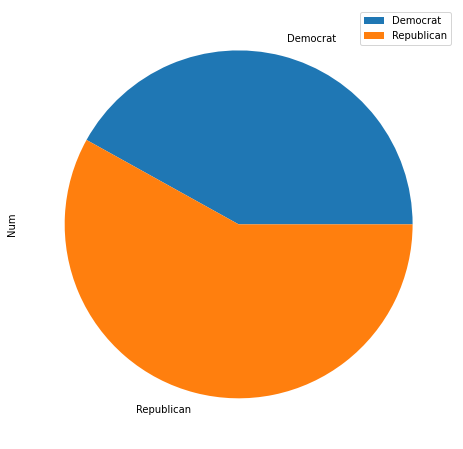

In [68]:
df.plot.pie(y='Num',figsize=(8,8))